# Import lib

In [41]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# Load dataset

In [2]:
# Replace 'file.csv' with the path to your CSV file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# Display the data length
print(len(train_data))
print(len(test_data))

2000
1000


In [3]:
train_dataset = pd.DataFrame(train_data)
test_dataset = pd.DataFrame(test_data)

In [4]:
test_dataset = test_dataset.drop(test_dataset.columns[0], axis=1)

In [5]:
train_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
test_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


# Visualize Data

## Correlation Matrix

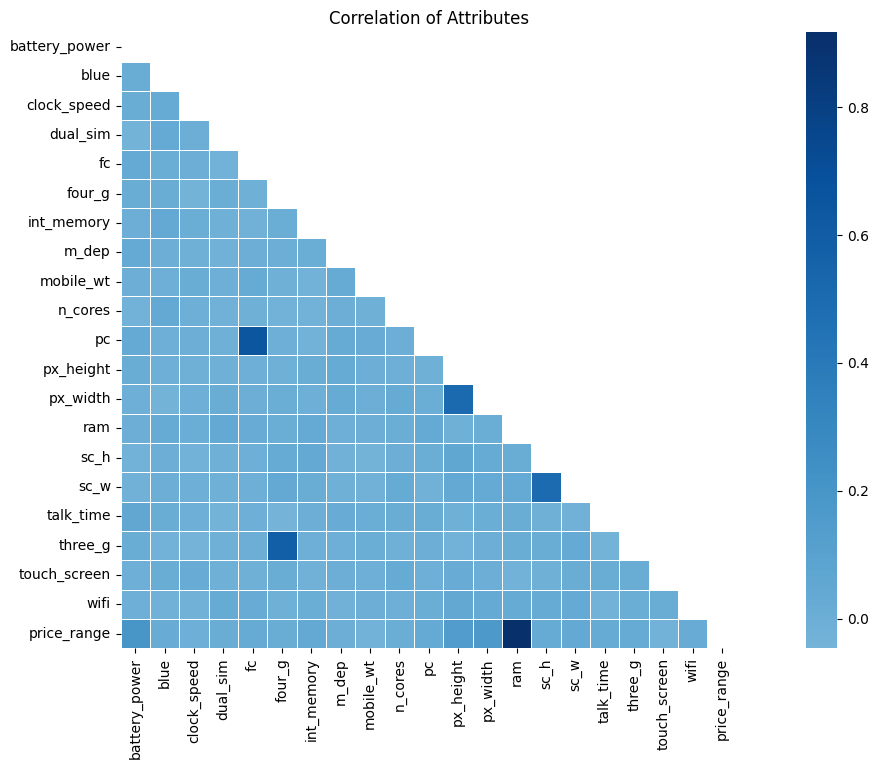

In [7]:
# Compute the correlation matrix
corr = train_dataset.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(18, 8))
sns.heatmap(corr, mask=mask, cmap='Blues', center=0, square=True, linewidths=.5)
plt.title("Correlation of Attributes")
plt.show()

 ### Explanation of Correlations in the Heatmap
These are the expected features to be correlated
1. Front and Primary Cameras
2. 4G and 3G
3. Pixel Resolution Height and Width
4. Screen Height and Width

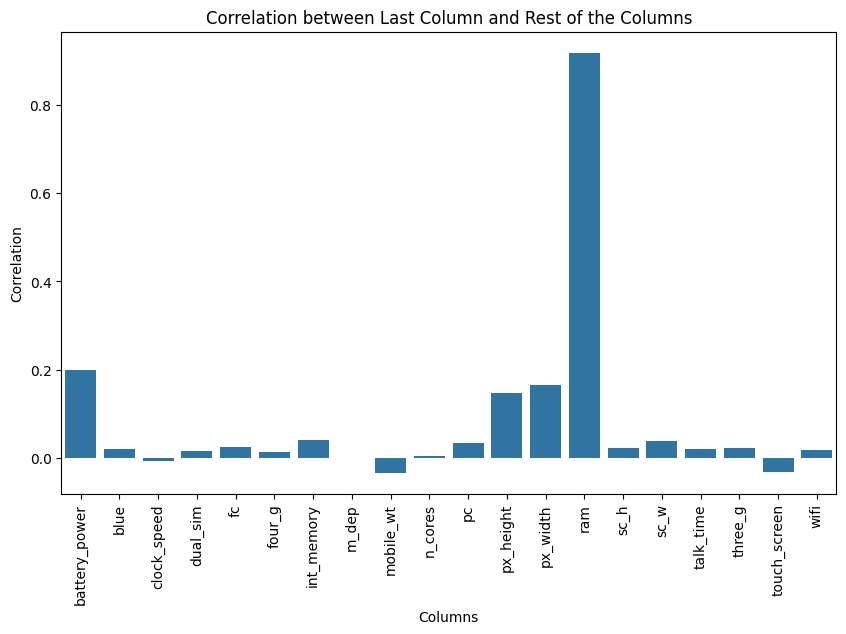

In [8]:
# Get the correlation values between the last column and the rest of the columns
last_col_corr = corr.iloc[:-1, -1]
# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=last_col_corr.index, y=last_col_corr.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation between Last Column and Rest of the Columns')
plt.show()

### The top 4 features correlated to the Price range are:
1. ram
2. battery_power
3. Pixel Resolution Width
4. Pixel Resolution height

## Histogram

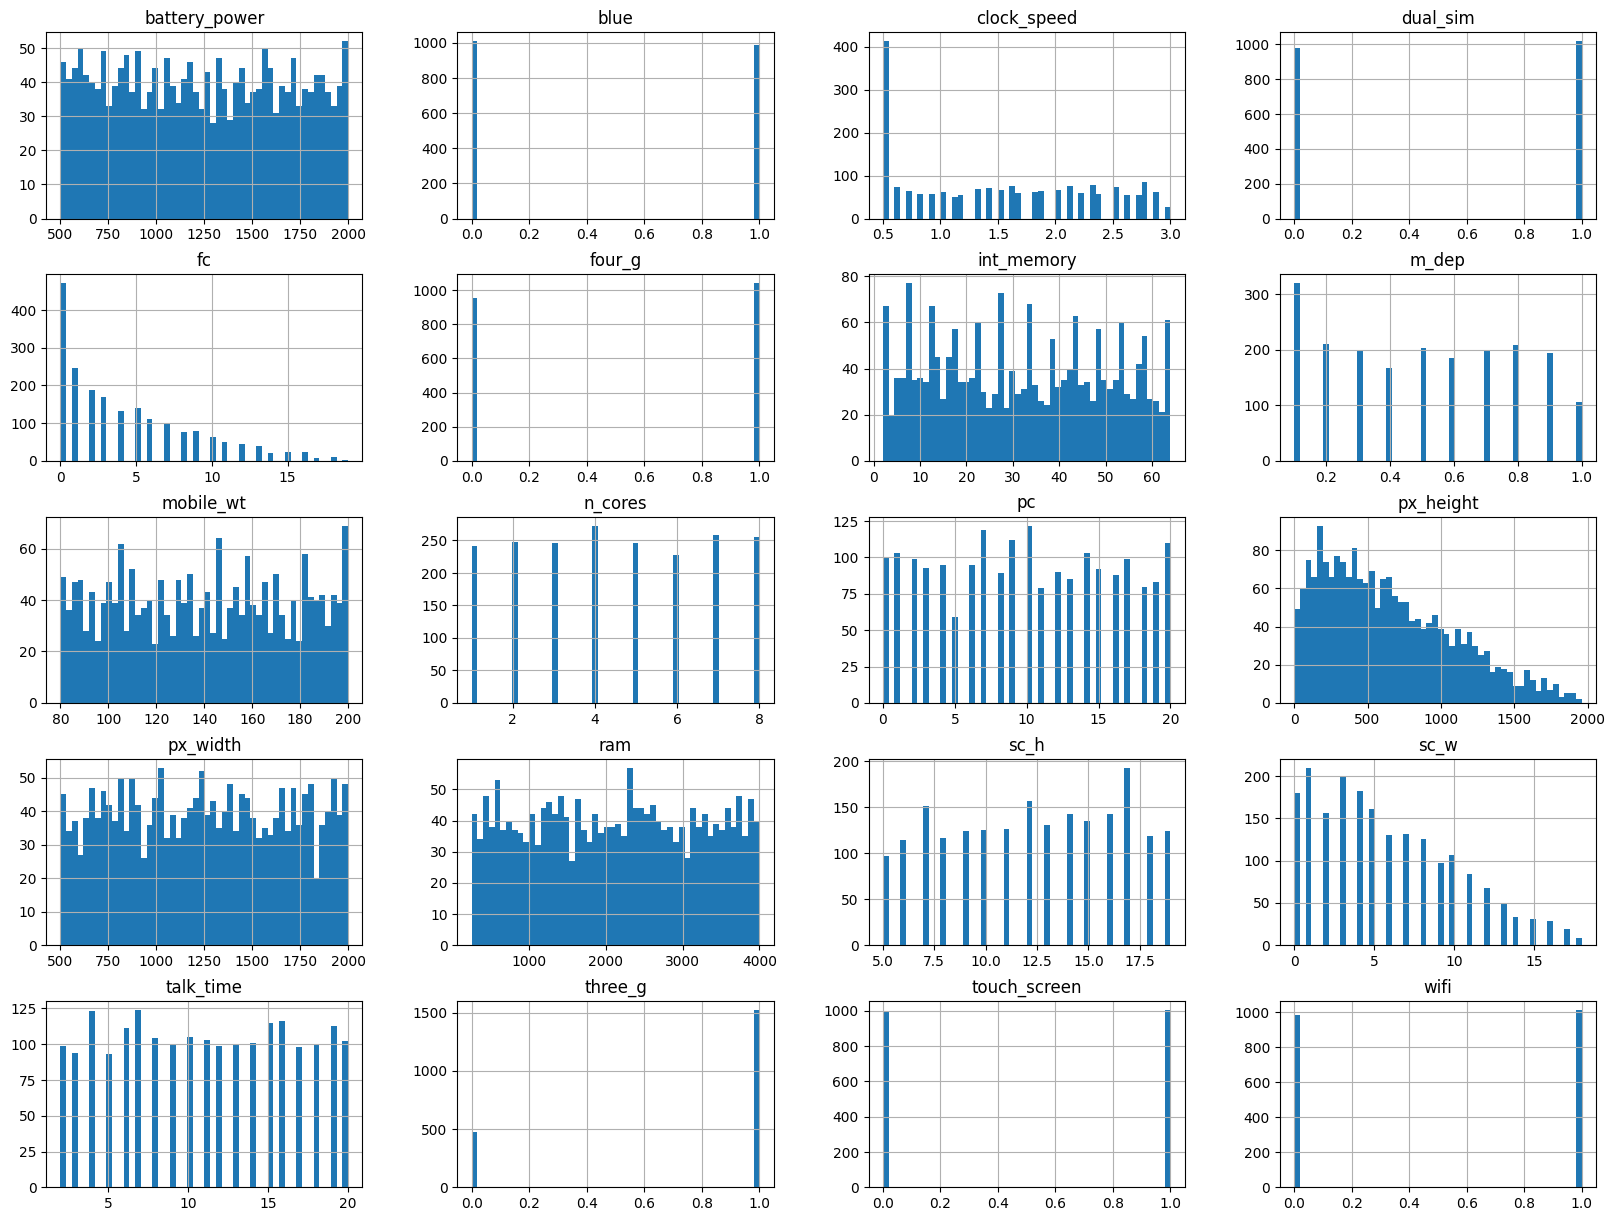

In [9]:
# Select all columns except the last one
cols_to_plot = train_data.iloc[:, :-1]
# Plot the columns
cols_to_plot.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

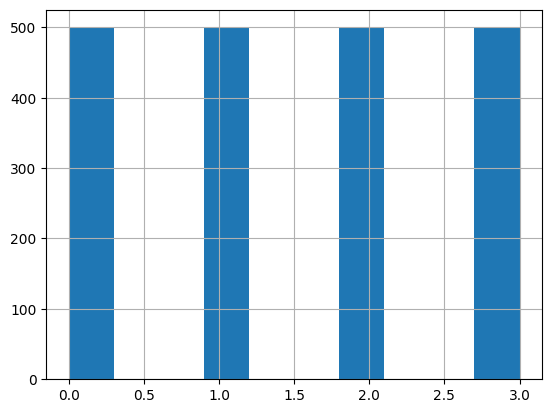

In [10]:
train_dataset['price_range'].hist()

### Labels are equally distriuted

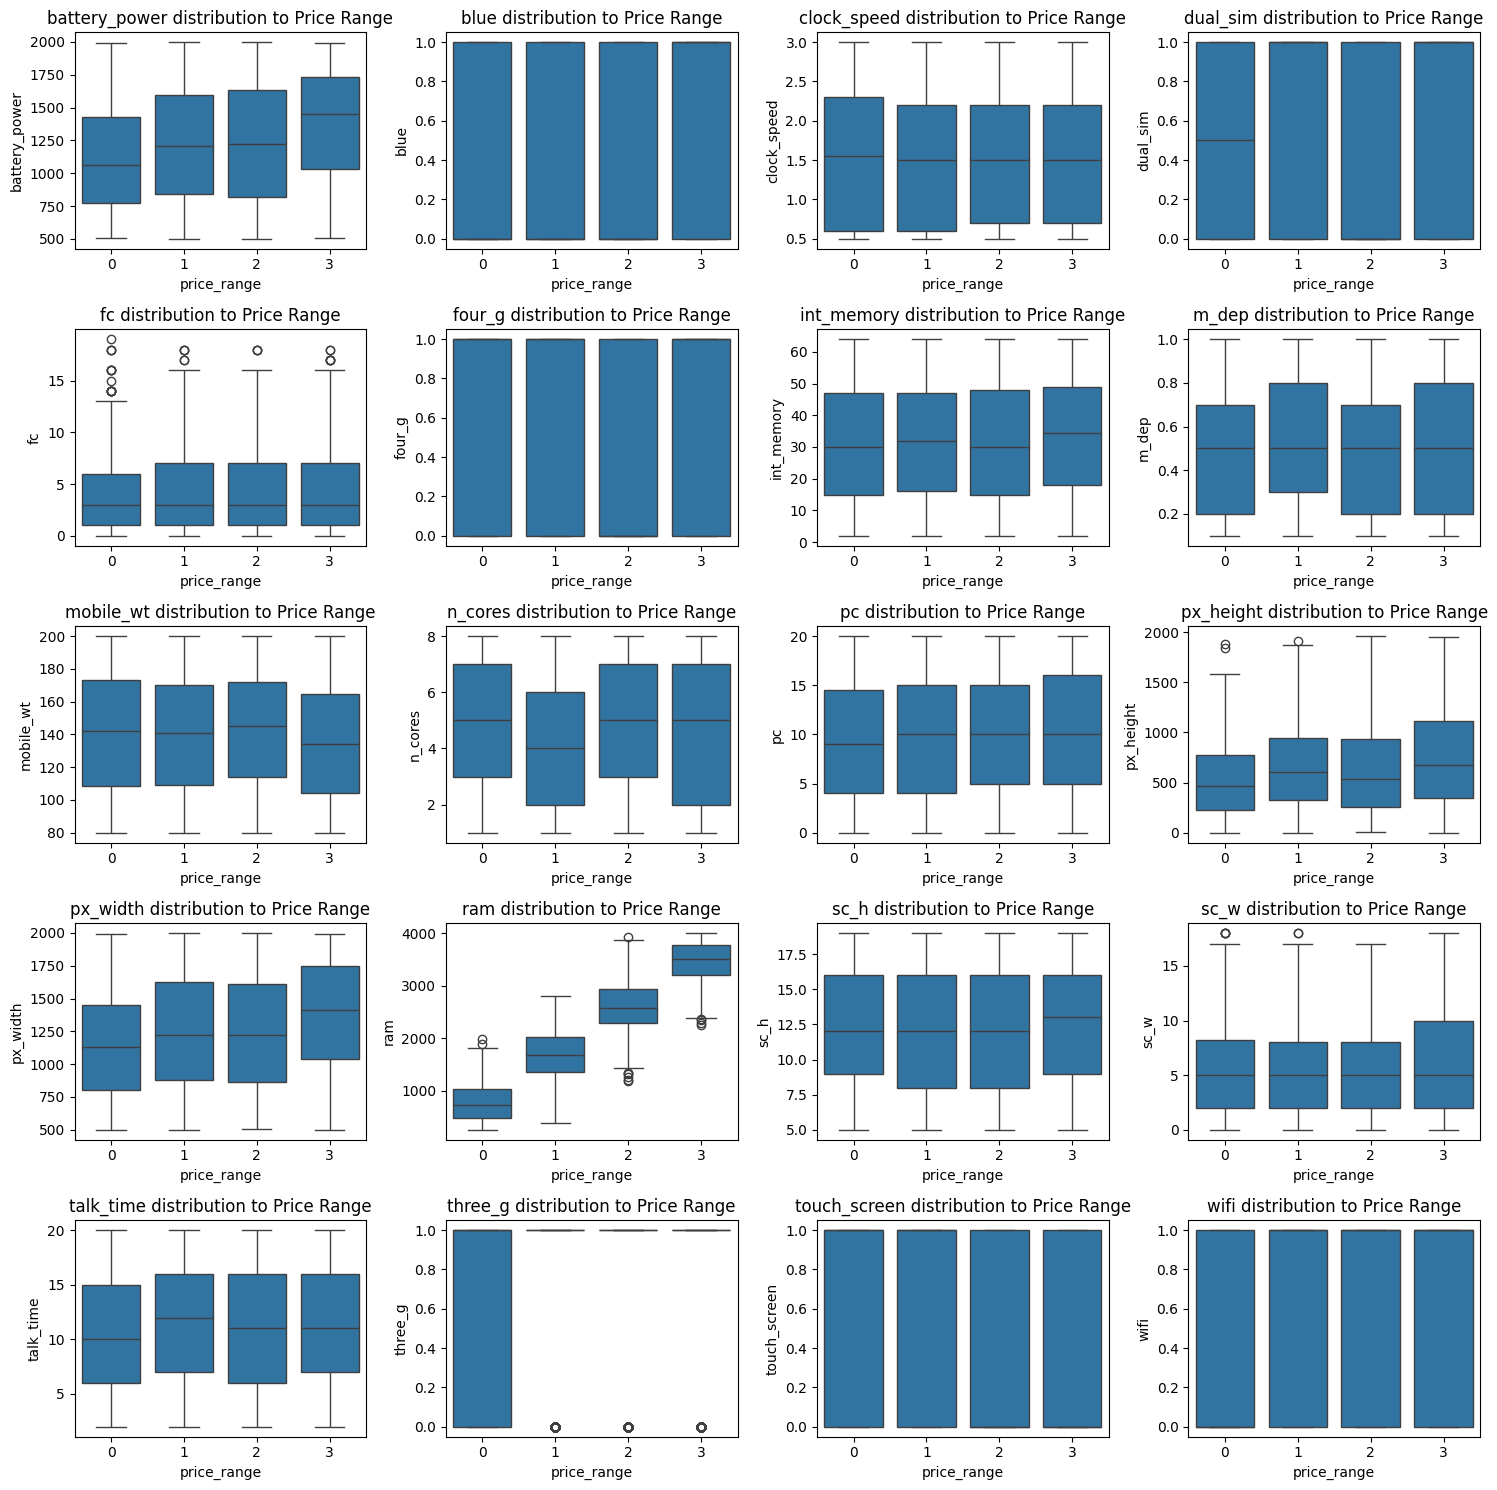

In [11]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(train_dataset.columns[0:-1], 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='price_range', y=feature, data=train_dataset)
    plt.title(f'{feature} distribution to Price Range')
plt.tight_layout()
plt.show()

### Observation to Feature-Labels distribution:
Most features are nearly eqaully distributed except for:
1. battery power: There is a slight shift in cost from low cost to medium cost and high cost to very high cost. 
2. RAM: Devices prices increase as the RAM increase.
3. PX_height and PX_width: Same as battery there is a slight shift from low to medium and hgh to very high.
4. All devices with 3G network are low cost price.

# Data Cleaning

## Check Duplicates

In [12]:
# Check for duplicates
has_duplicates = train_dataset.duplicated().any()
if(has_duplicates):
    train_dataset.drop_duplicates(inplace=True)
    print('Duplicates removed')
else:
    print('No duplicates found')

No duplicates found


No Duplicates

## Check Nulls

In [13]:
#Checking the missing values in our dataset if any
train_dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### There are some Null values in the dataset so we either remove them or fill them, but since our dataset is not that big we will fill the Nulls

Fill the Nulls then preprocess data

In [14]:
train_features = train_dataset.drop('price_range', axis=1)

In [33]:
categorical_features = ["blue", "dual_sim", "four_g", "three_g","touch_screen", "wifi"]
numerical_features = [col for col in train_features.columns if col not in categorical_features]

In [34]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")) # Perform one-hot encoding
])

In [35]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler().set_output(transform='pandas')) # Perform standard scaling
])

In [36]:
cat_preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_features)
])
num_preprocessor = ColumnTransformer([
     ('numerical', numerical_pipeline, numerical_features)
])

In [42]:
num_train_dataset_transformed = num_preprocessor.fit_transform(train_dataset[numerical_features])
num_train_dataset_transformed.columns = numerical_features
num_train_dataset_transformed.describe()
# Save the fitted transformer
joblib.dump(num_preprocessor, 'num_preprocessor.joblib')

['num_preprocessor.joblib']

In [43]:
cat_train_dataset_transformed = cat_preprocessor.fit_transform(train_dataset[categorical_features])
cat_train_dataset_transformed.describe()
# Save the fitted transformer
joblib.dump(cat_preprocessor, 'cat_preprocessor.joblib')

['cat_preprocessor.joblib']

In [39]:
train_dataset_transformed = pd.concat([num_train_dataset_transformed, cat_train_dataset_transformed], axis=1)
train_dataset_transformed['price_range'] = train_dataset['price_range']

In [40]:
train_dataset_transformed.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,...,categorical__dual_sim_1.0,categorical__four_g_0.0,categorical__four_g_1.0,categorical__three_g_0.0,categorical__three_g_1.0,categorical__touch_screen_0.0,categorical__touch_screen_1.0,categorical__wifi_0.0,categorical__wifi_1.0,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.149392e-16,-1.545430e-16,-9.237056e-17,6.750156e-17,-2.131628e-17,7.993606e-18,-9.769963e-18,4.618528e-17,5.329071e-17,-1.909584e-17,...,0.509500,0.477500,0.522500,0.238500,0.761500,0.497000,0.503000,0.493000,0.507000,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,0.500035,0.499618,0.499618,0.426273,0.426273,0.500116,0.500116,0.500076,0.500076,1.118314
min,-1.678817e+00,-1.253064e+00,-1.658348e+00,-1.396231e+00,-1.705355e+00,-1.455438e+00,-1.738967e+00,-1.722781e+00,-1.734686e+00,-1.323918e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.804033e-01,-1.007906e+00,-8.856886e-01,-1.049125e+00,-8.847656e-01,-8.169101e-01,-8.715477e-01,-8.453848e-01,-7.846287e-01,-8.647026e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,-2.849593e-02,-2.727384e-02,-2.649118e-03,-7.809867e-03,2.071282e-02,-1.817698e-01,-9.914854e-03,2.140652e-02,-7.208561e-02,-1.758795e-01,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.500000
75%,8.575560e-01,8.307794e-01,8.803903e-01,1.033506e+00,8.413027e-01,6.814564e-01,8.835446e-01,8.669892e-01,8.779718e-01,7.425513e-01,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000
max,1.728812e+00,1.811412e+00,1.763430e+00,1.727716e+00,1.690189e+00,2.970784e+00,1.728396e+00,1.727787e+00,1.590515e+00,2.809021e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Remove Nulls then preprocess data

In [23]:
train_dataset_non = train_dataset.dropna()
train_dataset_non.reset_index(drop=True, inplace=True)
train_dataset_non.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
train_dataset_non.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1986,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1987,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1988,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1989,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0
1990,510,1,2.0,1,5.0,1.0,45.0,0.9,168.0,6.0,...,483.0,754.0,3919.0,19.0,4.0,2,1,1,1,3


In [25]:
train_features_non = train_dataset_non.drop('price_range', axis=1)
train_target_non = train_dataset_non['price_range'].reset_index(drop=True)

In [26]:
categorical_features = ["blue","wifi","three_g","touch_screen","four_g","dual_sim"]
numerical_features = [col for col in train_features_non.columns if col not in categorical_features] 

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas'), categorical_features)
])

In [28]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
Ptrain_features = pipeline.fit_transform(train_features_non)
Ptrain_features['price_range'] = train_target_non
Ptrain_features.describe()

,continuous__battery_power,continuous__clock_speed,continuous__fc,continuous__int_memory,continuous__m_dep,continuous__mobile_wt,continuous__n_cores,continuous__pc,continuous__px_height,continuous__px_width,...,categorical__wifi_1,categorical__three_g_0,categorical__three_g_1,categorical__touch_screen_0,categorical__touch_screen_1,categorical__four_g_0.0,categorical__four_g_1.0,categorical__dual_sim_0,categorical__dual_sim_1,price_range
count,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1.213383e-16,1.164312e-16,-3.211896e-17,-3.925650e-17,-2.498141e-17,6.780669e-17,1.944981e-16,1.463197e-16,-1.284758e-16,2.007435e-16,...,0.505274,0.239076,0.760924,0.498242,0.501758,0.479156,0.520844,0.489201,0.510799,1.499247
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,...,0.500098,0.426626,0.426626,0.500123,0.500123,0.499691,0.499691,0.500009,0.500009,1.118539
min,-1.677405e+00,-1.254089e+00,-9.929103e-01,-1.658485e+00,-1.393208e+00,-1.702836e+00,-1.535056e+00,-1.635299e+00,-1.456058e+00,-1.739433e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.799630e-01,-1.008778e+00,-7.624236e-01,-8.864382e-01,-1.046647e+00,-8.833932e-01,-6.619530e-01,-8.101483e-01,-8.181302e-01,-8.698500e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.019293e-02,-2.753734e-02,-3.014502e-01,-4.099264e-03,-6.962558e-03,2.081995e-02,-2.254017e-01,1.500275e-02,-1.824601e-01,-9.530717e-03,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,8.582548e-01,8.310486e-01,6.204966e-01,8.782397e-01,1.032721e+00,8.402631e-01,1.084252e+00,8.401538e-01,6.835416e-01,8.843677e-01,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.728501e+00,1.812290e+00,3.386337e+00,1.760579e+00,1.725844e+00,1.687963e+00,1.520803e+00,1.665305e+00,2.969922e+00,1.729634e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## Save Preprocessed Data

### Filled Nulls Data

In [29]:
train_dataset_transformed.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,categorical__dual_sim_1.0,categorical__four_g_0.0,categorical__four_g_1.0,categorical__three_g_0.0,categorical__three_g_1.0,categorical__touch_screen_0.0,categorical__touch_screen_1.0,categorical__wifi_0.0,categorical__wifi_1.0,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.149392e-16,-1.545430e-16,-8.348877e-17,-9.237056e-17,6.750156e-17,-2.131628e-17,-1.634248e-16,-6.750156e-17,7.993606e-18,-9.769963e-18,...,0.509500,0.477500,0.522500,0.238500,0.761500,0.497000,0.503000,0.493000,0.507000,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,0.500035,0.499618,0.499618,0.426273,0.426273,0.500116,0.500116,0.500076,0.500076,1.118314
min,-1.678817e+00,-1.253064e+00,-9.947452e-01,-1.658348e+00,-1.396231e+00,-1.705355e+00,-1.538361e+00,-1.639177e+00,-1.455438e+00,-1.738967e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.804033e-01,-1.007906e+00,-7.637851e-01,-8.856886e-01,-1.049125e+00,-8.847656e-01,-6.635465e-01,-8.126459e-01,-8.169101e-01,-8.715477e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,-2.849593e-02,-2.727384e-02,-3.018649e-01,-2.649118e-03,-7.809867e-03,2.071282e-02,-2.261394e-01,1.388573e-02,-1.817698e-01,-9.914854e-03,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.500000
75%,8.575560e-01,8.307794e-01,6.219756e-01,8.803903e-01,1.033506e+00,8.413027e-01,1.086082e+00,8.404173e-01,6.814564e-01,8.835446e-01,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000
max,1.728812e+00,1.811412e+00,3.393497e+00,1.763430e+00,1.727716e+00,1.690189e+00,1.523489e+00,1.666949e+00,2.970784e+00,1.728396e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [30]:
train_dataset_transformed.to_csv('filled_processed_train2.csv', index=False)

### Removed Nulls Data

In [31]:
Ptrain_features.describe()

,continuous__battery_power,continuous__clock_speed,continuous__fc,continuous__int_memory,continuous__m_dep,continuous__mobile_wt,continuous__n_cores,continuous__pc,continuous__px_height,continuous__px_width,...,categorical__wifi_1,categorical__three_g_0,categorical__three_g_1,categorical__touch_screen_0,categorical__touch_screen_1,categorical__four_g_0.0,categorical__four_g_1.0,categorical__dual_sim_0,categorical__dual_sim_1,price_range
count,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1.213383e-16,1.164312e-16,-3.211896e-17,-3.925650e-17,-2.498141e-17,6.780669e-17,1.944981e-16,1.463197e-16,-1.284758e-16,2.007435e-16,...,0.505274,0.239076,0.760924,0.498242,0.501758,0.479156,0.520844,0.489201,0.510799,1.499247
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,...,0.500098,0.426626,0.426626,0.500123,0.500123,0.499691,0.499691,0.500009,0.500009,1.118539
min,-1.677405e+00,-1.254089e+00,-9.929103e-01,-1.658485e+00,-1.393208e+00,-1.702836e+00,-1.535056e+00,-1.635299e+00,-1.456058e+00,-1.739433e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.799630e-01,-1.008778e+00,-7.624236e-01,-8.864382e-01,-1.046647e+00,-8.833932e-01,-6.619530e-01,-8.101483e-01,-8.181302e-01,-8.698500e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.019293e-02,-2.753734e-02,-3.014502e-01,-4.099264e-03,-6.962558e-03,2.081995e-02,-2.254017e-01,1.500275e-02,-1.824601e-01,-9.530717e-03,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,8.582548e-01,8.310486e-01,6.204966e-01,8.782397e-01,1.032721e+00,8.402631e-01,1.084252e+00,8.401538e-01,6.835416e-01,8.843677e-01,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.728501e+00,1.812290e+00,3.386337e+00,1.760579e+00,1.725844e+00,1.687963e+00,1.520803e+00,1.665305e+00,2.969922e+00,1.729634e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
Ptrain_features.to_csv('removed_processed_train.csv', index=False)